# Machine Learning Project

Kathia Zamora Arias <kattia.zamora@prodigious.com><br />
Alejandro Madrigal Leival <me@alemadlei.tech>

In [85]:
# All dependencies go here
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [86]:
# Description
# LIMIT_BAL: Credit in Taiwan dollars.
# SEX: 
#   1 => Male
#   2 => Female
# EDUCATION: 
#   1 => Graduate School
#   2 => University
#   3 => High School
#   4 => Others
# MARRIAGE:
#   1 => Married
#   2 => Single
#   3 => Other
# AGE: Age
# PAY_0: Payment status for September 2005
# PAY_2: Payment status for August 2005
# PAY_3: Payment status for July 2005
# PAY_4: Payment status for June 2005
# PAY_5: Payment status for May 2005
# PAY_6: Payment status for April 2005
# - All of these have the following possible values
#   -1 => Pay duly
#    1 => One month payment delay
#    2 => Two months payment delay
#    . => . months payment delay
#    9 => Nine months or month payment delay.
# BILL_AMT1: Bill statement amount for September 2005.
# BILL_AMT2: Bill statement amount for August 2005.
# BILL_AMT3: Bill statement amount for July 2005.
# BILL_AMT4: Bill statement amount for June 2005.
# BILL_AMT5: Bill statement amount for May 2005.
# BILL_AMT6: Bill statement amount for April 2005.
# - All of these values are in Taiwan dollars.
# PAY_AMT1: Amount of previous payment for September 2005.
# PAY_AMT2: Amount of previous payment for August 2005.
# PAY_AMT3: Amount of previous payment for July 2005.
# PAY_AMT4: Amount of previous payment for June 2005.
# PAY_AMT5: Amount of previous payment for May 2005.
# PAY_AMT6: Amount of previous payment for April 2005.
# default payment next month: Indicates if the next month (October 2005) will be a default payment month.

# Loads and cleans up our dataset (first row in this case is the second one).
data = pd.read_csv('default_credit.csv', header=1);
data = data.astype('int32')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Descriptive Statistics (use charts, graphics and tables as needed) 

### 1 - Display graphics about payments made between sept 2005 and April 2005. Display and explain any important finding. (5 pts)

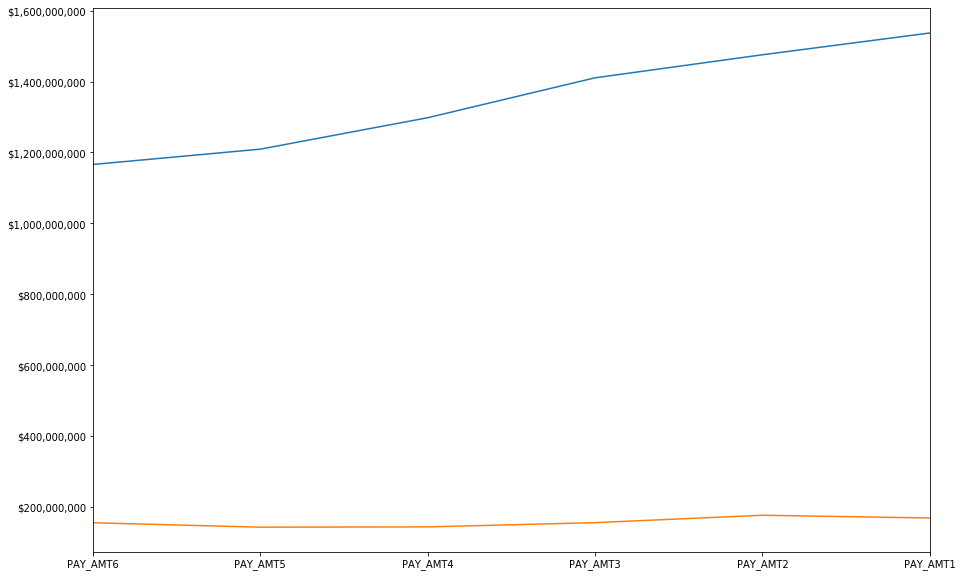

In [87]:
# General comparison between the billing statement and the payment in general.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
data[['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']].sum().plot(figsize=(15, 10))
data[['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']].sum().plot(figsize=(15, 10))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.show()

#### It seems that the total sum of billing statements has increased as time passes, but not how much people pay.

### 2 - What is the average amount we lend our customers? (use a box plot) (5 pts)

In [88]:
# This can be obtained multiple ways. We just describe the data to see all things that might be relevant.
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### From the initial dataset describe we observe that the mean amount is NT$ 167484.322667

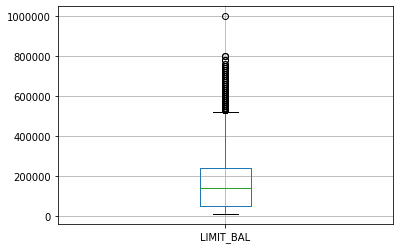

In [89]:
# However, plotting the data using boxplot we get the following.
data[['LIMIT_BAL']].boxplot()

In [90]:
# Which basically tells us that there are some noticeable outliers above a specific value.
# Just for evaluation purposes we define a separator value here. 
limitValue = 500000

# We separate this data into two groups. First the one that has 
underLimitValue = data.loc[data['LIMIT_BAL'] < limitValue][['LIMIT_BAL']]
underLimitValue.describe()

,LIMIT_BAL
count,29072.00000
mean,156172.93891
std,114631.76685
min,10000.00000
25%,50000.00000
50%,130000.00000
75%,230000.00000
max,490000.00000


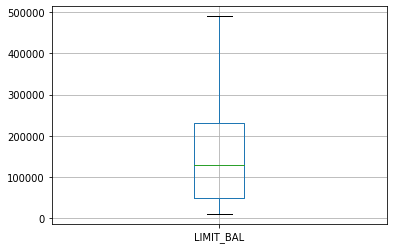

In [91]:
underLimitValue[['LIMIT_BAL']].boxplot()

In [92]:
overLimitValue = data.loc[data['LIMIT_BAL'] >= limitValue];
overLimitValue.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,...,928.000000,928.000000,928.000000,928.000000,9.280000e+02,928.000000,928.000000,928.000000,928.000000,928.000000
mean,15156.417026,521842.672414,1.548491,1.520474,1.445043,39.433190,-0.491379,-0.622845,-0.610991,-0.591595,...,95010.887931,88393.640086,86036.294181,15601.220905,2.178710e+04,18984.580819,15556.711207,18161.565733,20216.633621,0.112069
std,8801.019138,54590.255918,0.497911,0.748685,0.501559,8.270629,1.033386,0.969878,0.956761,0.915063,...,135590.065268,129068.002111,125170.454542,33423.121231,8.009591e+04,50498.871341,32979.835233,42125.101015,48450.435917,0.315621
min,7.000000,500000.000000,1.000000,1.000000,1.000000,23.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-4729.000000,-10505.000000,-39046.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7175.250000,500000.000000,1.000000,1.000000,1.000000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,5402.250000,4565.750000,3404.250000,2011.250000,2.000000e+03,1566.500000,1150.000000,1456.500000,1584.000000,0.000000
50%,14464.500000,500000.000000,2.000000,1.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,...,30814.000000,28905.000000,26753.500000,6500.500000,7.413000e+03,6443.500000,5482.000000,5303.500000,6073.500000,0.000000
75%,23332.750000,500000.000000,2.000000,2.000000,2.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,130190.000000,117332.500000,118563.000000,16655.500000,1.750375e+04,15889.750000,15000.000000,15033.750000,16684.000000,0.000000
max,29964.000000,1000000.000000,2.000000,6.000000,3.000000,73.000000,8.000000,7.000000,6.000000,5.000000,...,891586.000000,927171.000000,961664.000000,493358.000000,1.684259e+06,896040.000000,528897.000000,426529.000000,528666.000000,1.000000


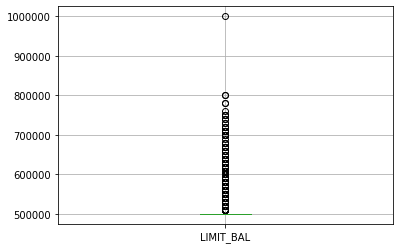

In [93]:
overLimitValue[['LIMIT_BAL']].boxplot()

### 3 - Which gender is more prone to default payment? (5 pts)

In [94]:
# Information for male.
data.loc[data['SEX'] == 1].loc[data['default payment next month'] == 1]['ID'].count()

2873

In [95]:
# Information for female.
data.loc[data['SEX'] == 2].loc[data['default payment next month'] == 1]['ID'].count()

3763

#### Based on the final results, females are more prone to default payment.

### 4 - Are single men more prone to default payments than married men? (5 pts)

In [96]:
# Information for married men.
data.loc[data['SEX'] == 1].loc[data['default payment next month'] == 1].loc[data['MARRIAGE'] == 1]['ID'].count()

1346

In [97]:
# Information for single men.
data.loc[data['SEX'] == 1].loc[data['default payment next month'] == 1].loc[data['MARRIAGE'] == 2]['ID'].count()

1485

#### That is indeed correct, single men are more prone to default payment compared to married men.

In [98]:
# Now, just for the lulz, we evaluate the other category.
data.loc[data['SEX'] == 1].loc[data['default payment next month'] == 1].loc[data['MARRIAGE'] == 3]['ID'].count()

40

### 5 - Is Education important to determine if someone defaults payments? (5 pts)

In [99]:
data.loc[data['default payment next month'] == 1][['EDUCATION', 'default payment next month']].groupby('EDUCATION').count()

,default payment next month
EDUCATION,
1,2036
2,3330
3,1237
4,7
5,18
6,8


In [100]:
data.loc[data['default payment next month'] == 0][['EDUCATION', 'default payment next month']].groupby('EDUCATION').count()

,default payment next month
EDUCATION,
0,14
1,8549
2,10700
3,3680
4,116
5,262
6,43


In [101]:
data[['EDUCATION', 'default payment next month']].groupby('EDUCATION').count()

,default payment next month
EDUCATION,
0,14
1,10585
2,14030
3,4917
4,123
5,280
6,51


#### Taking into consideration that:
1 => Graduate School
2 => University
3 => High School
4 => Others

## Predictive Statistics - 50pts

In [102]:
# Importing all required libraries.
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.spatial.distance import cdist
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

### 1 - Can we cluster our customers into categories? (unlabeled clustering) - (10 pts)

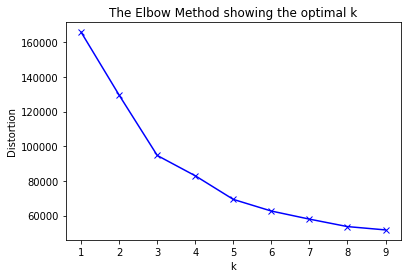

In [103]:
# As our data is not labeled in any way that would allows us to classify the people, we will attempt to
# figure this out by using KMeans.

# We get the data use to infere the clusters.
y = data['default payment next month'];
X = data.drop(['default payment next month'], axis=1)

# Uses PCA to transform data.
pca = decomposition.PCA(n_components = 2)
pca.fit(X)
X = pca.transform(X)

# Gets the clusters groups to plot and figure out the best number of clusters to use.
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

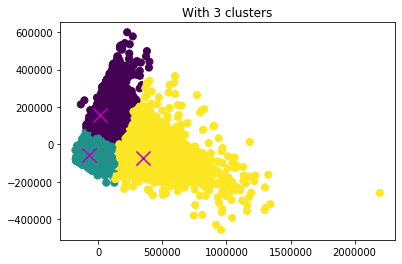

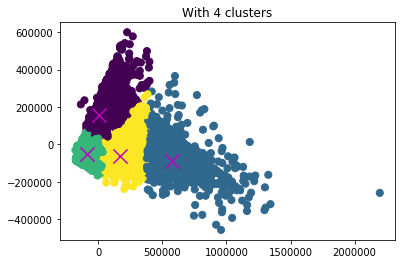

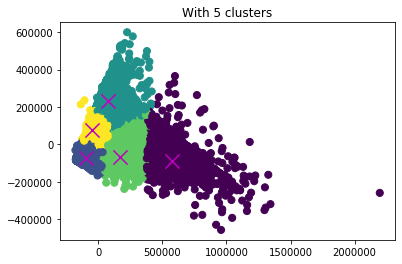

In [104]:
# Lets compare the groupings that could be used as elbows.
for i in range(3, 6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    predict = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    
    plt.title('With ' + str(i) + ' clusters')
    plt.scatter(X[ : , 0], X[ : , 1], s=50, c=predict)
    plt.scatter(centroids[ : , 0], centroids[ : , 1], s = 200, marker='x', c = 'm')
    plt.show()

#### Based on the data, we feel that 5 clusters is something that resembles the data we have with a good accuracy.

### 2 - Can cluster categories serve to predict payment defaults? – (10 pts)

In [105]:
# Will iterate over cluster variations...
for i in range(3, 6):

    print ('Evaluation scores for', str(i), 'clusters.')
    kmeans_model_cross_val = KMeans(n_clusters=i)

    # Cross validates data 
    scores = cross_val_score(kmeans_model_cross_val, X, y, scoring='neg_mean_squared_error', cv=10)
    print('Cross-validated scores:', -scores)

    predictions = cross_val_predict(kmeans_model_cross_val, X, y, cv=10)
    accuracy = metrics.r2_score(y, predictions)
    print('Cross-Predicted Accuracy:', -accuracy)
    print('================================')

Evaluation scores for 3 clusters.
Cross-validated scores: [2.274      1.21666667 0.778      0.75533333 1.22       0.80433333
 1.24166667 1.332      1.382      2.02533333]
Cross-Predicted Accuracy: 6.08130280646908
Evaluation scores for 4 clusters.
Cross-validated scores: [2.26533333 1.69133333 2.13333333 2.98933333 2.293      1.29733333
 2.193      3.10433333 1.92133333 2.281     ]
Cross-Predicted Accuracy: 11.616587922316308
Evaluation scores for 5 clusters.
Cross-validated scores: [7.57133333 4.58233333 3.588      3.69833333 3.68       6.581
 3.00933333 6.125      8.09933333 5.36733333]
Cross-Predicted Accuracy: 28.433738804045607


#### Based on the data, our initial assumption that 5 clusters better represents the data seems to be valid, as it is the one with the highest score. However, because it is so low, we can confirm that using clusters to attempt to predict payment default is not going to provide any help at all.